In [1]:
#Reading the csv file
import pandas as pd 
from pandas import DataFrame, read_csv
cpi = pd.read_csv('CPI2019II.csv', skiprows=0, index_col=False)
cpi.columns = list(map(str, cpi.columns))
#file = r'CPI2019II.xls'
#cpi = pd.read_excel(file)

cpi

,Category,Switzerland,United Kingdom,Spain
0,CPI score 2019,85.0,77.0,62.0
1,Sources 2019,7.0,8.0,8.0
2,Standard error 2019,1.6,3.3,3.2
3,CPI score 2018,85.0,80.0,58.0
4,Sources 2018,7.0,8.0,8.0
5,Standard error 2018,1.6,2.0,4.3
6,CPI score 2017,85.0,82.0,57.0
7,Sources 2017,7.0,8.0,8.0
8,Standard error 2017,1.7,1.7,3.8
9,CPI score 2016,86.0,81.0,58.0


In [2]:
cpi_sel = cpi[cpi.index % 3 == 0]
cpi_sel = cpi_sel[['Switzerland', 'United Kingdom','Spain']]
cpi_sel['Year'] = ['2019','2018','2017','2016','2015','2014','2013','2012']
cpi_sel

,Switzerland,United Kingdom,Spain,Year
0,85.0,77.0,62.0,2019
3,85.0,80.0,58.0,2018
6,85.0,82.0,57.0,2017
9,86.0,81.0,58.0,2016
12,86.0,81.0,58.0,2015
15,86.0,78.0,60.0,2014
18,85.0,76.0,59.0,2013
21,86.0,74.0,65.0,2012


In [3]:
cpi_sel.sort_values(['Year'], ascending=True, axis=0, inplace=True)
cpi_sel.set_index('Year', inplace=True)
cpi_sel


,Switzerland,United Kingdom,Spain
Year,,,
2012,86.0,74.0,65.0
2013,85.0,76.0,59.0
2014,86.0,78.0,60.0
2015,86.0,81.0,58.0
2016,86.0,81.0,58.0
2017,85.0,82.0,57.0
2018,85.0,80.0,58.0
2019,85.0,77.0,62.0


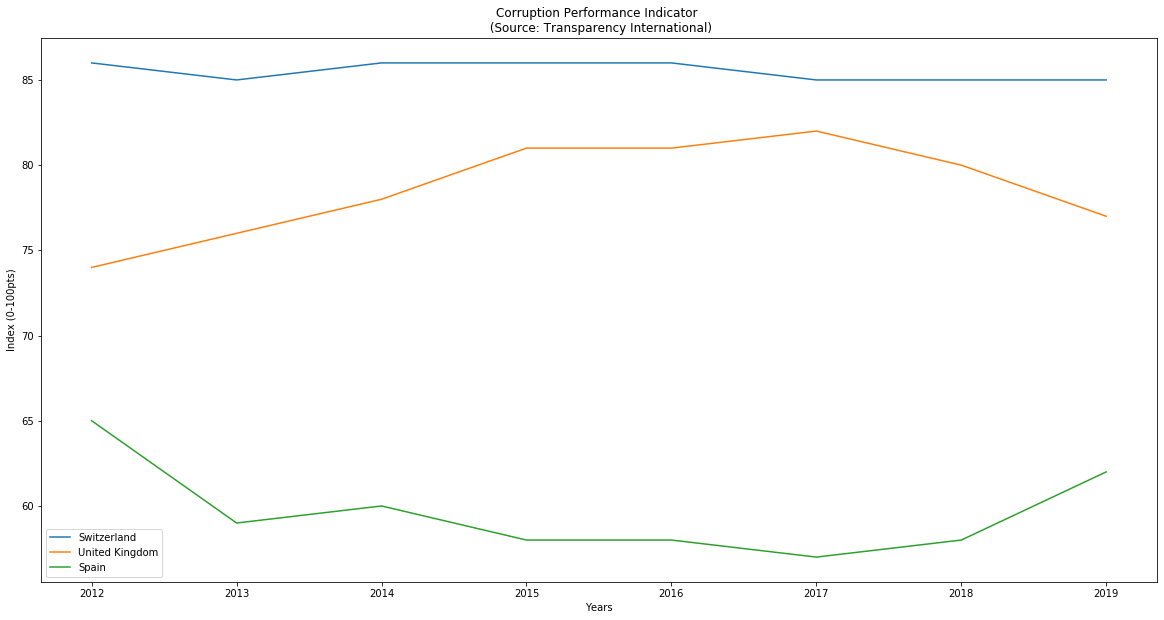

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

cpi_sel.index = cpi_sel.index.map(int) # let's change the index values of df_top5 to type integer for plotting
cpi_sel.plot(kind='line', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Corruption Performance Indicator \n (Source: Transparency International)')
plt.ylabel('Index (0-100pts)')
plt.xlabel('Years')

plt.show()

In [5]:
import pandas as pd 
from pandas import DataFrame, read_csv
gpi = pd.read_csv('WorldBank_Governance_Indicators.csv', skiprows=0, index_col=False)
gpi = gpi.dropna()
gpi.drop(['Country Code'], axis=1, inplace=True)
gpi.rename(columns={'Country Name':'Country','2010 [YR2010]':'2010','2011 [YR2011]':'2011','2012 [YR2012]':'2012','2013 [YR2013]':'2013','2014 [YR2014]':'2014','2015 [YR2015]':'2015','2016 [YR2016]':'2016','2017 [YR2017]':'2017','2018 [YR2018]':'2018'}, inplace=True)
gpi_rank = gpi[gpi['Series Name'].str.match('.*[Rank]$')]
gpi_rank.head()

,Country,Series Name,2010,2011,2012,2013,2014,2015,2016,2017,2018
3,Spain,Accountability: Rank,85.30806,83.09859,82.15962,78.40376,76.84729,82.75862,82.26601,81.28078,82.75862
4,Spain,Rule of Law: Rank,86.25592,85.91549,83.09859,81.69014,80.28846,79.32692,80.76923,81.25000,80.28846
5,Spain,Reg_Quality: Rank,84.21053,81.51659,78.19905,79.14692,75.00000,75.48077,81.25000,79.80769,80.28846
7,Spain,Absence of Violence: Rank,33.64929,48.34123,42.65403,46.91943,55.23809,55.71429,60.95238,56.19048,55.23809
10,Spain,Gov_Effectiveness: Rank,78.94736,81.51659,82.46445,82.93839,84.13461,85.09615,83.17308,81.73077,79.32692


In [6]:
gpi = gpi_rank.T
gpi

,3,4,5,7,10,11,15,16,17,19,22,23,27,28,29,31,34,35
Country,Spain,Spain,Spain,Spain,Spain,Spain,Switzerland,Switzerland,Switzerland,Switzerland,Switzerland,Switzerland,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom
Series Name,Accountability: Rank,Rule of Law: Rank,Reg_Quality: Rank,Absence of Violence: Rank,Gov_Effectiveness: Rank,Control of Corruption: Rank,Accountability: Rank,Rule of Law: Rank,Reg_Quality: Rank,Absence of Violence: Rank,Gov_Effectiveness: Rank,Control of Corruption: Rank,Accountability: Rank,Rule of Law: Rank,Reg_Quality: Rank,Absence of Violence: Rank,Gov_Effectiveness: Rank,Control of Corruption: Rank
2010,85.3081,86.2559,84.2105,33.6493,78.9474,82.3809,99.0521,94.3128,94.7368,92.4171,97.6077,96.6667,91.9431,94.7867,97.6077,60.1896,91.866,92.3809
2011,83.0986,85.9155,81.5166,48.3412,81.5166,82.4644,98.5915,93.8967,94.7867,94.3128,97.6303,95.7346,92.0188,92.4883,95.2607,58.7678,91.9431,92.4171
2012,82.1596,83.0986,78.199,42.654,82.4644,83.4123,98.1221,96.7136,95.2607,98.5782,97.6303,97.6303,92.4883,92.9578,94.7867,59.7156,92.4171,92.891
2013,78.4038,81.6901,79.1469,46.9194,82.9384,78.199,98.1221,96.2441,94.3128,98.1043,97.6303,97.6303,92.4883,93.8967,96.2085,63.0332,90.5213,93.3649
2014,76.8473,80.2885,75,55.2381,84.1346,72.1154,99.0148,98.0769,96.1539,98.0952,99.5192,97.5961,90.1478,94.7115,97.1154,59.5238,92.7885,93.2692
2015,82.7586,79.3269,75.4808,55.7143,85.0961,69.7115,98.5222,97.5961,95.1923,96.6667,99.5192,97.5961,92.1182,93.75,98.5577,61.4286,94.2308,93.75
2016,82.266,80.7692,81.25,60.9524,83.1731,68.2692,97.537,98.0769,98.0769,94.7619,99.5192,95.6731,93.1034,92.7885,95.1923,58.5714,92.7885,94.2308
2017,81.2808,81.25,79.8077,56.1905,81.7308,68.2692,98.0296,98.5577,97.1154,94.2857,99.5192,96.6346,93.1034,92.7885,94.2308,59.0476,90.3846,94.7115


In [7]:
new_header = gpi.iloc[0] #grab the first row for the header
gpi = gpi[1:] #take the data less the header row
gpi.columns = new_header #set the header row as the df header

gpi_spa = gpi.filter(like='Spain')
gpi_che = gpi.filter(like='Switzerland')
gpi_gbr = gpi.filter(like='United Kingdom')
gpi_spa

Country,Spain,Spain,Spain,Spain,Spain,Spain
Series Name,Accountability: Rank,Rule of Law: Rank,Reg_Quality: Rank,Absence of Violence: Rank,Gov_Effectiveness: Rank,Control of Corruption: Rank
2010,85.3081,86.2559,84.2105,33.6493,78.9474,82.3809
2011,83.0986,85.9155,81.5166,48.3412,81.5166,82.4644
2012,82.1596,83.0986,78.199,42.654,82.4644,83.4123
2013,78.4038,81.6901,79.1469,46.9194,82.9384,78.199
2014,76.8473,80.2885,75,55.2381,84.1346,72.1154
2015,82.7586,79.3269,75.4808,55.7143,85.0961,69.7115
2016,82.266,80.7692,81.25,60.9524,83.1731,68.2692
2017,81.2808,81.25,79.8077,56.1905,81.7308,68.2692
2018,82.7586,80.2885,80.2885,55.2381,79.3269,72.5961


In [8]:
spa_header = gpi_spa.iloc[0] #grab the first row for the header
spa_rk = gpi_spa[1:] #take the data less the header row
spa_rk.columns = spa_header #set the header row as the df header
spa_rk.rename_axis('Years', inplace=True)

che_header = gpi_che.iloc[0] #grab the first row for the header
che_rk = gpi_che[1:] #take the data less the header row
che_rk.columns = che_header #set the header row as the df header
che_rk.rename_axis('Years', inplace=True)

gbr_header = gpi_gbr.iloc[0] #grab the first row for the header
gbr_rk = gpi_gbr[1:] #take the data less the header row
gbr_rk.columns = gbr_header #set the header row as the df header
gbr_rk.rename_axis('Years', inplace=True)
gbr_rk

Series Name,Accountability: Rank,Rule of Law: Rank,Reg_Quality: Rank,Absence of Violence: Rank,Gov_Effectiveness: Rank,Control of Corruption: Rank
Years,,,,,,
2010,91.9431,94.7867,97.6077,60.1896,91.866,92.3809
2011,92.0188,92.4883,95.2607,58.7678,91.9431,92.4171
2012,92.4883,92.9578,94.7867,59.7156,92.4171,92.891
2013,92.4883,93.8967,96.2085,63.0332,90.5213,93.3649
2014,90.1478,94.7115,97.1154,59.5238,92.7885,93.2692
2015,92.1182,93.75,98.5577,61.4286,94.2308,93.75
2016,93.1034,92.7885,95.1923,58.5714,92.7885,94.2308
2017,93.1034,92.7885,94.2308,59.0476,90.3846,94.7115
2018,93.5961,91.8269,96.1539,48.0952,87.9808,93.2692


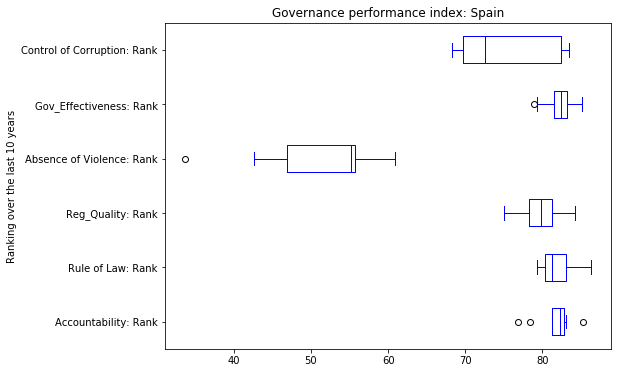

In [9]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

spa_rk.plot(kind='box', figsize=(8, 6), color='blue' , vert=False)

plt.title('Governance performance index: Spain')
plt.ylabel('Ranking over the last 10 years')

plt.show()

In [10]:
acc = pd.concat([spa_rk['Accountability: Rank'], che_rk['Accountability: Rank'], gbr_rk['Accountability: Rank']], axis=1, keys=['Spain', 'Switzerland', 'United Kingdom'])
vio = pd.concat([spa_rk['Absence of Violence: Rank'], che_rk['Absence of Violence: Rank'], gbr_rk['Absence of Violence: Rank']], axis=1, keys=['Spain', 'Switzerland', 'United Kingdom'])
gov = pd.concat([spa_rk['Gov_Effectiveness: Rank'], che_rk['Gov_Effectiveness: Rank'], gbr_rk['Gov_Effectiveness: Rank']], axis=1, keys=['Spain', 'Switzerland', 'United Kingdom'])
cor = pd.concat([spa_rk['Control of Corruption: Rank'], che_rk['Control of Corruption: Rank'], gbr_rk['Control of Corruption: Rank']], axis=1, keys=['Spain', 'Switzerland', 'United Kingdom'])
gov

,Spain,Switzerland,United Kingdom
Years,,,
2010,78.9474,97.6077,91.866
2011,81.5166,97.6303,91.9431
2012,82.4644,97.6303,92.4171
2013,82.9384,97.6303,90.5213
2014,84.1346,99.5192,92.7885
2015,85.0961,99.5192,94.2308
2016,83.1731,99.5192,92.7885
2017,81.7308,99.5192,90.3846
2018,79.3269,99.5192,87.9808


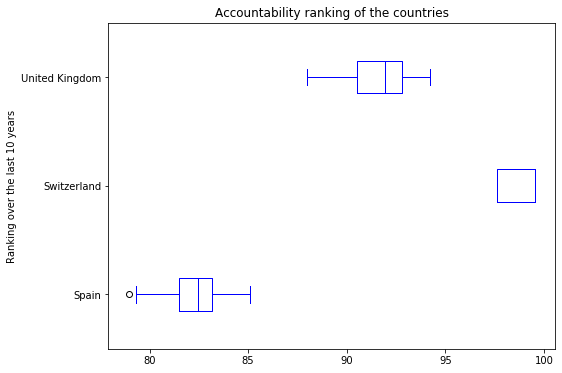

In [11]:
gov.plot(kind='box', figsize=(8, 6), color='blue' , vert=False)

plt.title('Accountability ranking of the countries')
plt.ylabel('Ranking over the last 10 years')

plt.show()

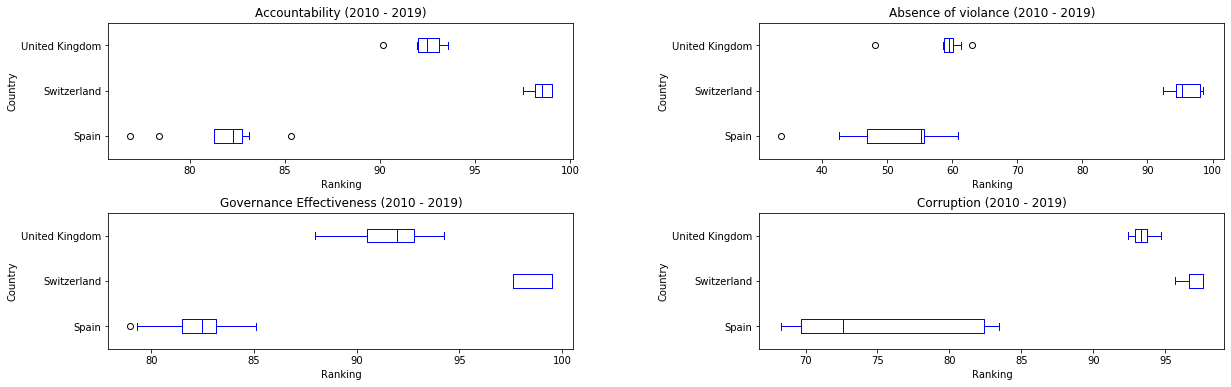

In [12]:
fig = plt.figure() # create figure
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (1 row, 2 columns, first plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: Box plot, Accountability
acc.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Accountability (2010 - 2019)')
ax0.set_xlabel('Ranking')
ax0.set_ylabel('Country')

# Subplot 2: Box plot, Violence
vio.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax1) # add to subplot 1
ax1.set_title('Absence of violance (2010 - 2019)')
ax1.set_xlabel('Ranking')
ax1.set_ylabel('Country')

# Subplot 3: Box plot, Governance Effectiveness
gov.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax2) # add to subplot 1
ax2.set_title('Governance Effectiveness (2010 - 2019)')
ax2.set_xlabel('Ranking')
ax2.set_ylabel('Country')

# Subplot 4: Box plot, Violence
cor.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax3) # add to subplot 1
ax3.set_title('Corruption (2010 - 2019)')
ax3.set_xlabel('Ranking')
ax3.set_ylabel('Country')

plt.show()

In [13]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Proparty cost (Choropleth Map)

In [176]:
# importing libraries and files


import pandas as pd 
from pandas import DataFrame, read_csv
import folium

prop = pd.read_csv('PropPriceEUR.csv', skiprows=0)
prop = prop.dropna()
prop.head()

,Location,City,Country,Cost
0,"Tirana, Albania",Tirana,Albania,1663.71
1,"Vienna, Austria",Vienna,Austria,7138.82
2,"Linz, Austria",Linz,Austria,4074.44
3,"Graz, Austria",Graz,Austria,3745.00
4,"Minsk, Belarus",Minsk,Belarus,1477.79


In [177]:
#prop[['City','Country']] = prop['Location'].str.split(',',expand=True)
prop.replace(' ','')
prop.head()

,Location,City,Country,Cost
0,"Tirana, Albania",Tirana,Albania,1663.71
1,"Vienna, Austria",Vienna,Austria,7138.82
2,"Linz, Austria",Linz,Austria,4074.44
3,"Graz, Austria",Graz,Austria,3745.00
4,"Minsk, Belarus",Minsk,Belarus,1477.79


In [178]:

sel = prop[prop['City'].isin(['London','Zurich','Barcelona'])]
#sel = sel.rename({'EUR / m2':'Cost'}, axis=1).astype({'Cost': int})
sel.columns = list(map(str, sel.columns))

ctry = sel[['Country','City','Cost']]
ctry.sort_values(by=['Country'], ascending=False)
ctry.replace(' ','')
ctry.reset_index(drop=True, inplace=True) 

ctry

,Country,City,Cost
0,Spain,Barcelona,4524.33
1,Switzerland,Zurich,11728.95
2,United Kingdom,London,12412.50


In [179]:
ctry.dtypes

Country     object
City        object
Cost       float64
dtype: object

In [180]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [183]:
# Creating the EUR map with the three cities imposed
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[51.4934, 0], zoom_start=3, tiles="Mapbox Bright")

# generate choropleth map using the average property cost of each of the three countries
world_map.choropleth(
    geo_data=world_geo,
    data=prop,
    columns=['Country', 'Cost'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

# Creating the overall table

Preparation for the desicion tree

In [22]:
import pandas as pd 
from pandas import DataFrame, read_csv
import numpy as np 
from sklearn.tree import DecisionTreeClassifier

tree = pd.read_csv('DecisionMatrixII.csv', skiprows=0, delimiter=",")
tree = tree.dropna()
tree = tree.drop(['Nb','Year'], axis=1)
tree = tree[['U_Emp', 'UL_Cost', 'Wage', 'Cor_Tax', 'CPI_Rank','GPI_Acc','GPI_Law','GPI_Qual','GPI_Violo','GPI_Effe','GPI_Corr','Prop_Cost','Country']]
tree.head()

,U_Emp,UL_Cost,Wage,Cor_Tax,CPI_Rank,GPI_Acc,GPI_Law,GPI_Qual,GPI_Violo,GPI_Effe,GPI_Corr,Prop_Cost,Country
0,19.875,105.6,41034,30.0,60,85.30806,86.25592,84.21053,33.64929,78.94736,82.38095,5921.47,Spain
1,21.408,103.8,40453,30.0,62,83.09859,85.91549,81.51659,48.34123,81.51659,82.46445,5746.78,Spain
2,24.792,101.2,39302,30.0,65,82.15962,83.09859,78.19905,42.65403,82.46445,83.41232,5577.25,Spain
3,26.117,100.3,39391,30.0,59,78.40376,81.69014,79.14692,46.91943,82.93839,78.19905,5412.72,Spain
4,24.450,100.0,39398,30.0,60,76.84729,80.28846,75.00000,55.23809,84.13461,72.11539,5253.05,Spain


In [23]:
# Preprocessing / defining features
X = tree[['U_Emp', 'UL_Cost', 'Wage', 'Cor_Tax', 'CPI_Rank','GPI_Acc','GPI_Law','GPI_Qual','GPI_Violo','GPI_Effe','GPI_Corr','Prop_Cost']].values
X[0:5]

array([[1.987500e+01, 1.056000e+02, 4.103400e+04, 3.000000e+01,
        6.000000e+01, 8.530806e+01, 8.625592e+01, 8.421053e+01,
        3.364929e+01, 7.894736e+01, 8.238095e+01, 5.921470e+03],
       [2.140800e+01, 1.038000e+02, 4.045300e+04, 3.000000e+01,
        6.200000e+01, 8.309859e+01, 8.591549e+01, 8.151659e+01,
        4.834123e+01, 8.151659e+01, 8.246445e+01, 5.746780e+03],
       [2.479200e+01, 1.012000e+02, 3.930200e+04, 3.000000e+01,
        6.500000e+01, 8.215962e+01, 8.309859e+01, 7.819905e+01,
        4.265403e+01, 8.246445e+01, 8.341232e+01, 5.577250e+03],
       [2.611700e+01, 1.003000e+02, 3.939100e+04, 3.000000e+01,
        5.900000e+01, 7.840376e+01, 8.169014e+01, 7.914692e+01,
        4.691943e+01, 8.293839e+01, 7.819905e+01, 5.412720e+03],
       [2.445000e+01, 1.000000e+02, 3.939800e+04, 3.000000e+01,
        6.000000e+01, 7.684729e+01, 8.028846e+01, 7.500000e+01,
        5.523809e+01, 8.413461e+01, 7.211539e+01, 5.253050e+03]])

In [24]:
y = tree["Country"]
y[0:5]

0    Spain
1    Spain
2    Spain
3    Spain
4    Spain
Name: Country, dtype: object

In [25]:
# Setting up the Decision Tree
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [27]:
y_trainset.shape
y_testset.shape

(9,)

In [28]:
# Modelling
ctryTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
ctryTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
ctryTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
# Prediction
predTree = ctryTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

['Switzerland' 'Spain' 'United Kingdom' 'United Kingdom' 'Switzerland']
15       Switzerland
5              Spain
22    United Kingdom
26    United Kingdom
18       Switzerland
Name: Country, dtype: object


In [31]:
# Evaluation
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


In [38]:
# Visulaisation (install libraries if needed)
#!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

#  conda update -n base -c defaults conda    in case an update is necessary

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\roger\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python-graphviz-0.14       |     pyh9f0ad1d_0          19 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          19 KB

The following NEW packages will be INSTALLED:

  python-graphviz    conda-forge/noarch::python-graphviz-0.14-pyh9f0ad1d_0




python-graphviz-0.14 | 19 KB     |            |   0% 
python-graphviz-0.14 | 19 KB     | ########6  |  86% 
python-graphviz-0.14 | 19 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [39]:
dot_data = StringIO()
filename = "ctrytree.png"
featureNames = tree.columns[0:10]
targetNames = tree["Country"].unique().tolist()
out=tree.export_graphviz(ctryTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

AttributeError: module 'sklearn.tree' has no attribute 'columns'

In [40]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.tree(dot_graph)

TypeError: <module 'sklearn.tree' from 'C:\\Users\\roger\\anaconda3\\lib\\site-packages\\sklearn\\tree\\__init__.py'> is not an estimator instance.

In [10]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [30]:
import pandas as pd
import io
import requests
url="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv"
s=requests.get(url).content
my_data=pd.read_csv(io.StringIO(s.decode('utf-8')))
my_data[0:3]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


In [32]:
my_data = pd.read_csv('DecisionMatrixII.csv', skiprows=0, delimiter=",")
my_data= my_data.dropna()
my_data = my_data.drop(['Nb','Year'], axis=1)
my_data = my_data[['U_Emp', 'UL_Cost', 'Wage', 'Cor_Tax', 'CPI_Rank','GPI_Acc','GPI_Law','GPI_Qual','GPI_Violo','GPI_Effe','GPI_Corr','Prop_Cost','Country']]
my_data[0:5]

,U_Emp,UL_Cost,Wage,Cor_Tax,CPI_Rank,GPI_Acc,GPI_Law,GPI_Qual,GPI_Violo,GPI_Effe,GPI_Corr,Prop_Cost,Country
0,19.875,105.6,41034,30.0,60,85.30806,86.25592,84.21053,33.64929,78.94736,82.38095,5921.47,Spain
1,21.408,103.8,40453,30.0,62,83.09859,85.91549,81.51659,48.34123,81.51659,82.46445,5746.78,Spain
2,24.792,101.2,39302,30.0,65,82.15962,83.09859,78.19905,42.65403,82.46445,83.41232,5577.25,Spain
3,26.117,100.3,39391,30.0,59,78.40376,81.69014,79.14692,46.91943,82.93839,78.19905,5412.72,Spain
4,24.450,100.0,39398,30.0,60,76.84729,80.28846,75.00000,55.23809,84.13461,72.11539,5253.05,Spain


In [33]:
X = my_data[['U_Emp', 'UL_Cost', 'Wage', 'Cor_Tax', 'CPI_Rank','GPI_Acc','GPI_Law','GPI_Qual','GPI_Violo','GPI_Effe','GPI_Corr','Prop_Cost']].values
X[0:5]

array([[1.987500e+01, 1.056000e+02, 4.103400e+04, 3.000000e+01,
        6.000000e+01, 8.530806e+01, 8.625592e+01, 8.421053e+01,
        3.364929e+01, 7.894736e+01, 8.238095e+01, 5.921470e+03],
       [2.140800e+01, 1.038000e+02, 4.045300e+04, 3.000000e+01,
        6.200000e+01, 8.309859e+01, 8.591549e+01, 8.151659e+01,
        4.834123e+01, 8.151659e+01, 8.246445e+01, 5.746780e+03],
       [2.479200e+01, 1.012000e+02, 3.930200e+04, 3.000000e+01,
        6.500000e+01, 8.215962e+01, 8.309859e+01, 7.819905e+01,
        4.265403e+01, 8.246445e+01, 8.341232e+01, 5.577250e+03],
       [2.611700e+01, 1.003000e+02, 3.939100e+04, 3.000000e+01,
        5.900000e+01, 7.840376e+01, 8.169014e+01, 7.914692e+01,
        4.691943e+01, 8.293839e+01, 7.819905e+01, 5.412720e+03],
       [2.445000e+01, 1.000000e+02, 3.939800e+04, 3.000000e+01,
        6.000000e+01, 7.684729e+01, 8.028846e+01, 7.500000e+01,
        5.523809e+01, 8.413461e+01, 7.211539e+01, 5.253050e+03]])

In [14]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [34]:
y = my_data["Country"]
y[0:5]

0    Spain
1    Spain
2    Spain
3    Spain
4    Spain
Name: Country, dtype: object

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [44]:
ctryTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
ctryTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
ctryTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
predTree = ctryTree.predict(X_testset)

In [47]:
print (predTree [0:5])
print (y_testset [0:5])

['Switzerland' 'Spain' 'United Kingdom' 'United Kingdom' 'Switzerland']
15       Switzerland
5              Spain
22    United Kingdom
26    United Kingdom
18       Switzerland
Name: Country, dtype: object


In [48]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


In [25]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [26]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

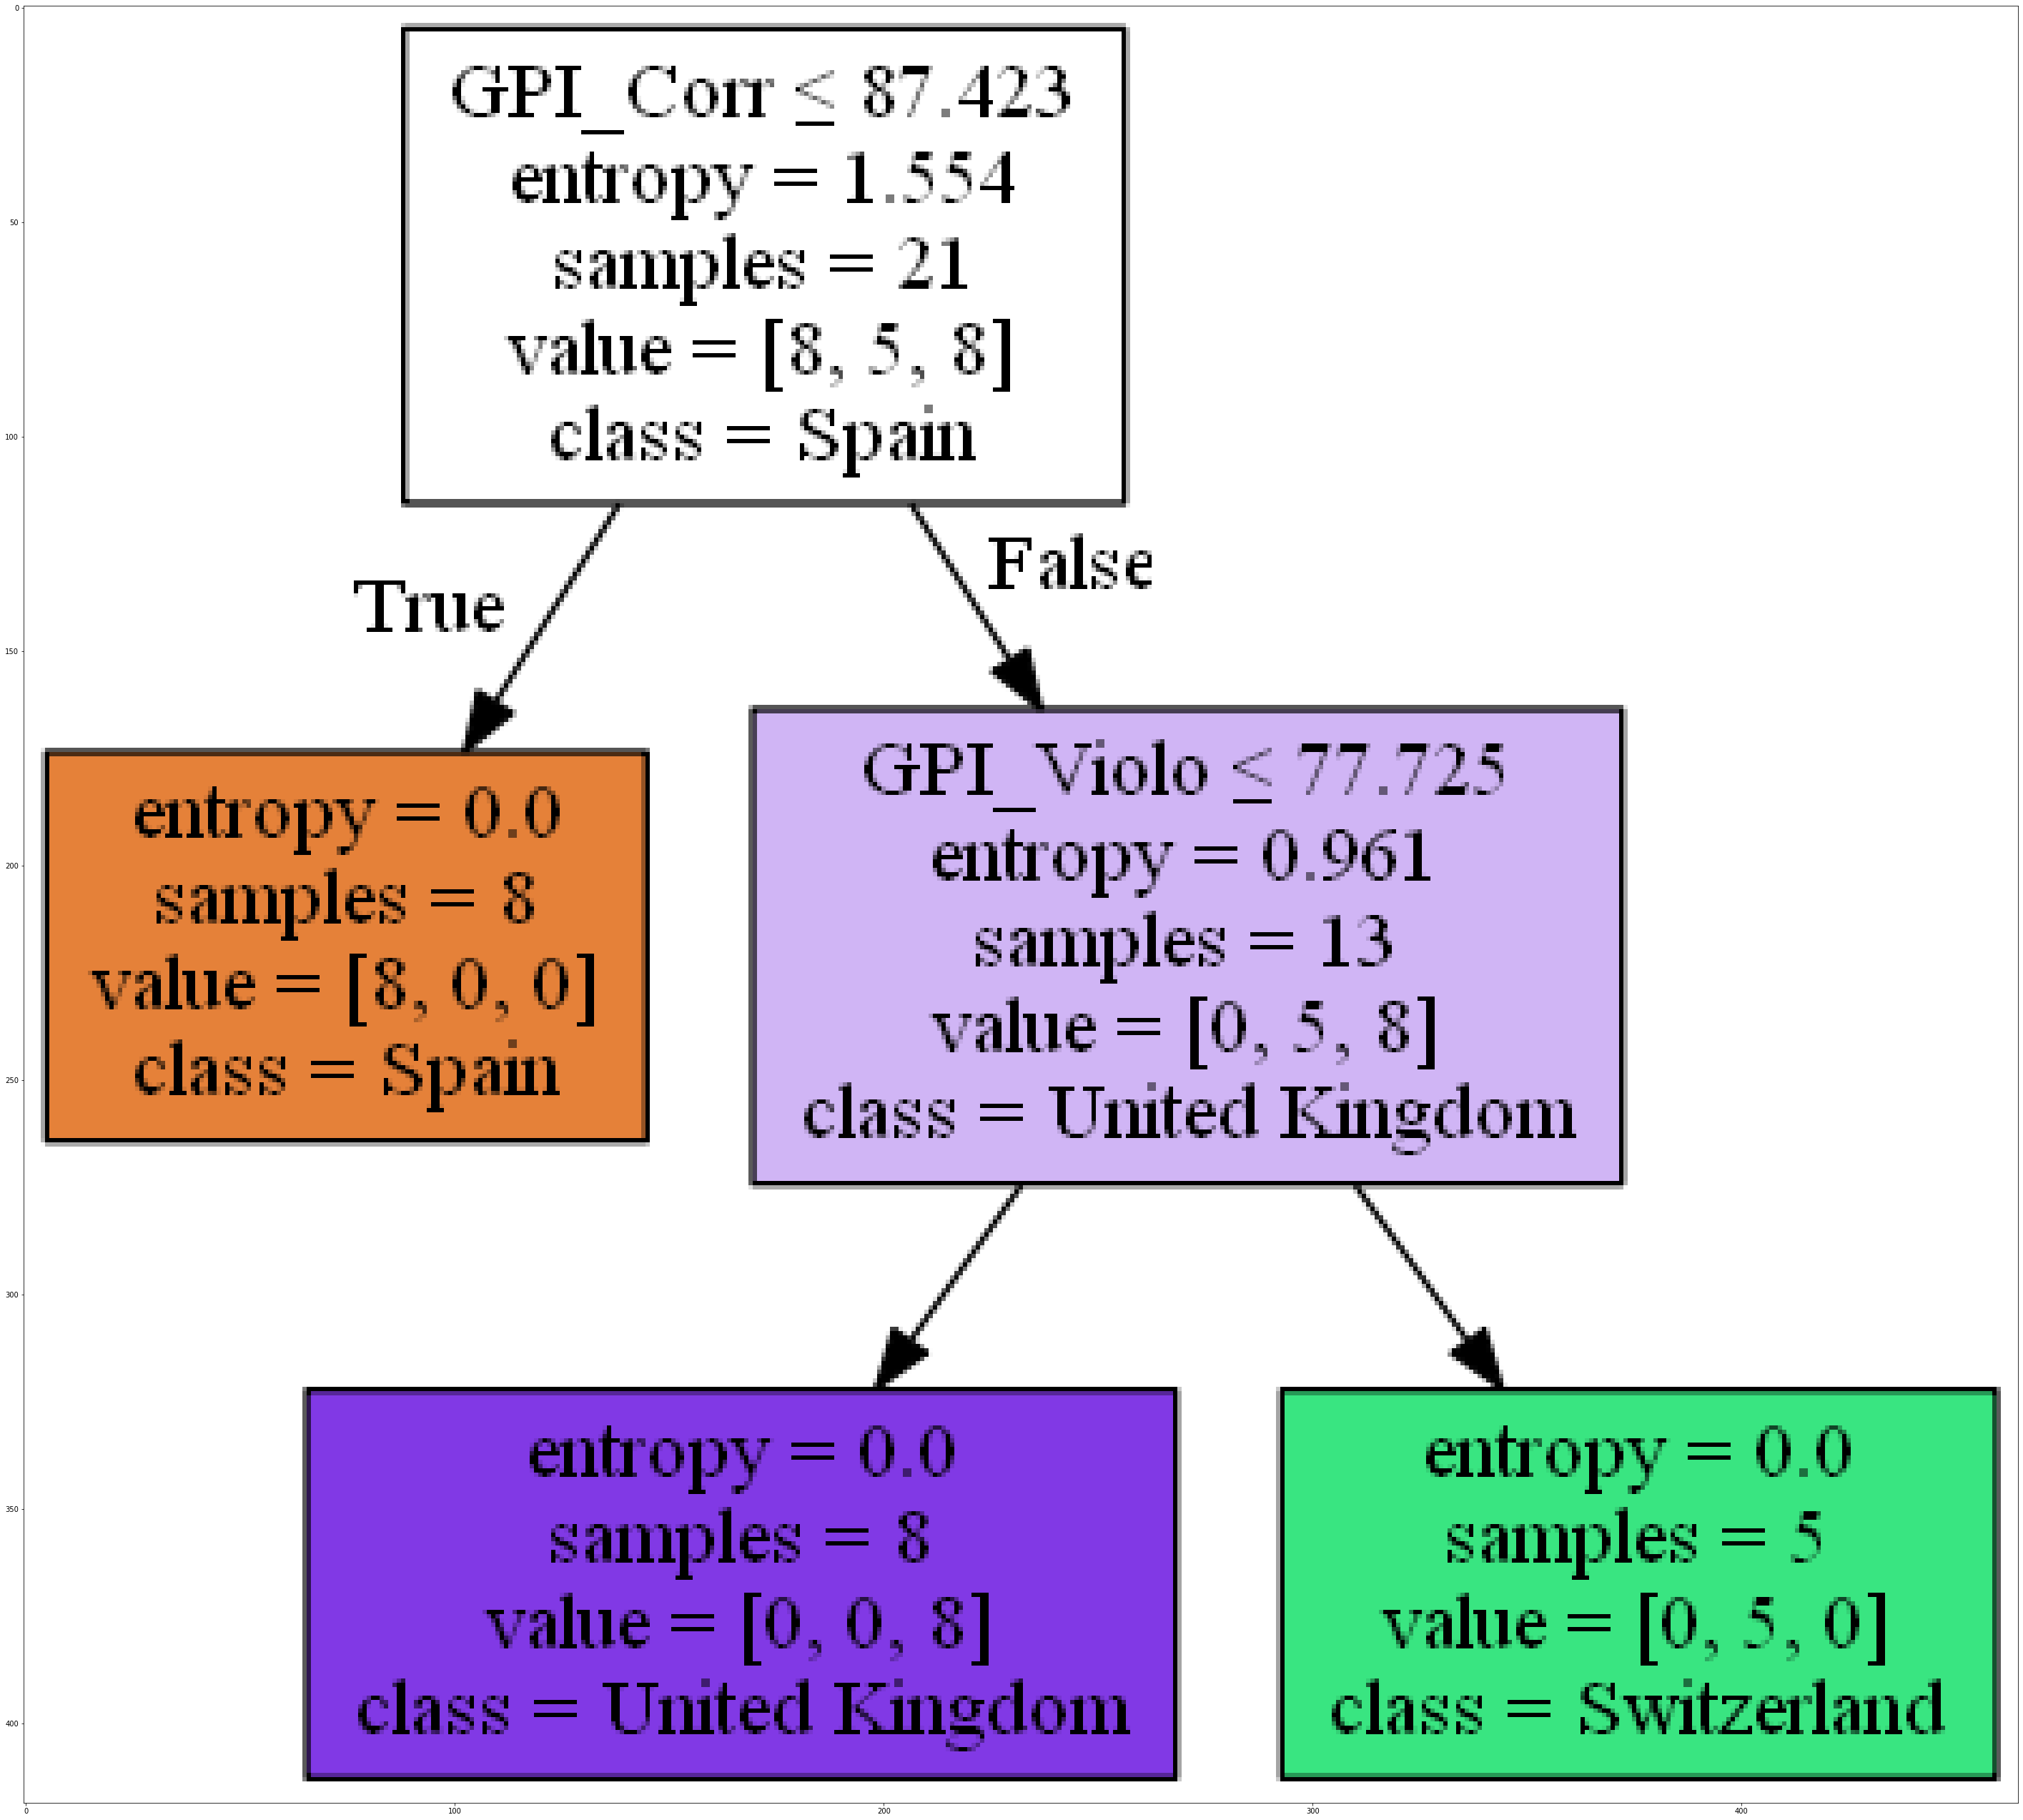

In [50]:
dot_data = StringIO()
filename = "ctytree.png"
featureNames = my_data.columns[0:12]
targetNames = my_data["Country"].unique().tolist()
out=tree.export_graphviz(ctryTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(50, 100))
plt.imshow(img,interpolation='nearest')